# Density Functional Theory: Grid
## I. Theoretical Overview
This tutorial will discuss the basics of DFT and discuss the grid used to evaluate DFT quantities.
As with HF, DFT aims to solve the generalized eigenvalue problem:

$$\sum_{\nu} F_{\mu\nu}C_{\nu i} = \epsilon_i\sum_{\nu}S_{\mu\nu}C_{\nu i}$$
$${\bf FC} = {\bf SC\epsilon},$$

While with HF the Fock matrix is constructed as:

$$F^{HF}_{\mu\nu} = H_{\mu\nu} + 2J[D]_{\mu\nu} - K[D]_{\mu\nu}$$

$$D_{\mu\nu} = C_{\mu i} C_{\nu i},$$

with DFT we generalize this construction slightly to:
$$F^{DFT}_{\mu\nu} = H_{\mu\nu} + 2J[D]_{\mu\nu} - \zeta K[D]_{\mu\nu} + V^{\rm{xc}}_{\mu\nu}.$$

$\zeta$ is an adjustable parameter where we can vary the amount of exact (HF) exchange and $V$ is the DFT potenital which typically attempts to add dynamical correlation in the self-consistent field methodolgy.



## 2. Examining the Grid
We will discuss the evaluation and manipulation of the grid.

In [9]:
using PyCall: pyimport
psi4 = pyimport("psi4")
np   = pyimport("numpy") # used only to cast to Psi4 arrays
import PyPlot: plt, matplotlib
matplotlib.use(backend="MacOSX")

In [2]:
build_superfunctional = nothing
if VersionNumber(psi4.__version__) >= v"1.3a1"
    build_superfunctional = psi4.driver.dft.build_superfunctional
else
    build_superfunctional = psi4.driver.dft_funcs.build_superfunctional
end

PyObject <function build_superfunctional at 0x1554d0dd0>

Set computation options and molecule, any single atom will do.

In [3]:
mol = psi4.geometry("He")
psi4.set_options(Dict("BASIS" => "cc-pvdz",
                      "DFT_SPHERICAL_POINTS" => 50,
                      "DFT_RADIAL_POINTS" => 12))

In [4]:
basis = psi4.core.BasisSet.build(mol, "ORBITAL", "CC-PVDZ")
sup = build_superfunctional("PBE", true)[1]
Vpot = psi4.core.VBase.build(basis, sup, "RV")
Vpot.initialize()

   => Loading Basis Set <=

    Name: CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry HE         line    32 file /Users/daniel/miniconda3/envs/p4env/share/psi4/basis/cc-pvdz.gbs 



In [5]:
x, y, z, w = Vpot.get_np_xyzw()
R = @. sqrt(x^2 + y^2 + z^2);

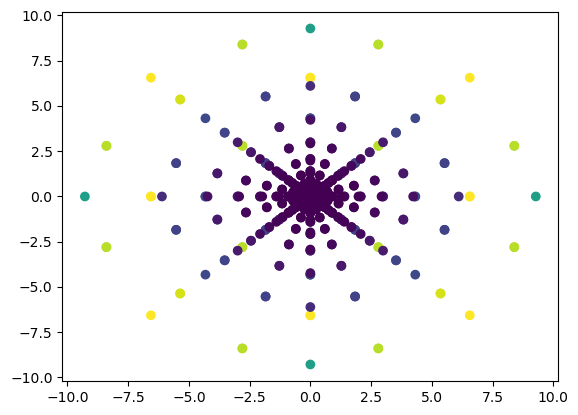

PyObject <matplotlib.collections.PathCollection object at 0x15a1ebe90>

In [6]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=w)
#ax.set_xscale("log")

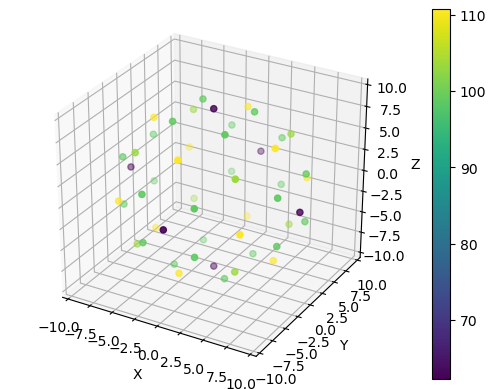

PyObject Text(0.09381482303043878, 0.012568803034537291, 'Z')

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
mask = R .> 8
p = ax.scatter(x[mask], y[mask], z[mask], c=w[mask], marker="o")
plt.colorbar(p)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

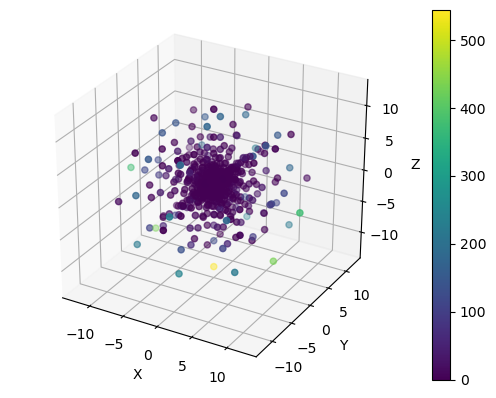

   => Loading Basis Set <=

    Name: CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry O          line   198 file /Users/daniel/miniconda3/envs/p4env/share/psi4/basis/cc-pvdz.gbs 
    atoms 2-3 entry H          line    22 file /Users/daniel/miniconda3/envs/p4env/share/psi4/basis/cc-pvdz.gbs 



PyObject Text(0.09381482303043875, 0.012568803034537284, 'Z')

In [8]:
mol = psi4.geometry("""
 O
 H 1 1.1
 H 1 1.1 2 104
""")
mol.update_geometry()
psi4.set_options(Dict("BASIS" => "cc-pvdz",
                      "DFT_SPHERICAL_POINTS" => 26,
                      "DFT_RADIAL_POINTS" => 12))

basis = psi4.core.BasisSet.build(mol, "ORBITAL", "CC-PVDZ")
sup = build_superfunctional("PBE", true)[1]
Vpot = psi4.core.VBase.build(basis, sup, "RV")
Vpot.initialize()
x, y, z, w = Vpot.get_np_xyzw()
R = @. sqrt(x^2 + y^2 + z^2)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
mask = R .> 0
p = ax.scatter(x[mask], y[mask], z[mask], c=w[mask], marker="o")
plt.colorbar(p)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

## Refs:
- Koch, W. and Holthausen, M.C., **2001**, A Chemist’s Guide to Density Functional Theory, 2nd, Wiley-VCH, Weinheim.
- Kohn, W. and Sham, L. *J, Phys. Rev.*, **1965**, *140*, A1133- A1138
- Becke, A.D., *J. Chem. Phys.*, **1988**, *88*, 2547
- Treutler, O. and Ahlrichs, R., *J. Chem. Phys.*, **1995**, *102*, 346
- Gill, P.M.W., Johnson, B.G., and Pople, J.A., *Chem. Phys. Lett.*, **1993,209 (5), pp. 506, 16 July 1993.